# 🚦 US Traffic Accidents Analysis  
### *Project 1 – Flatiron School Data Science Program*  
#### **A CRISP-DM Data Analysis for the US Department of Transportation (DOT)**


# 🛣️ Project Title: Identifying Patterns and Risk Factors in US Traffic Accidents

This project analyzes a large real-world dataset of traffic accidents across the United States.  
The goal is to uncover **patterns, trends, and contributing factors** that can help the  
**US Department of Transportation (DOT)** reduce future accidents and improve overall road safety.

The project follows the **CRISP-DM methodology**, covering:

- Business Understanding  
- Data Understanding  
- Data Preparation  
- Exploratory Data Analysis (EDA)  
- Statistical Analysis  
- Insights & Recommendations  
- Dashboard Development (Tableau)


## 📘 Project Overview

Traffic accidents pose a major threat to public safety and result in billions of dollars in economic loss each year.  
The DOT relies on data-driven insights to:

- Allocate infrastructure budgets effectively  
- Identify high-risk road segments and time periods  
- Implement targeted safety policies  
- Improve emergency response planning  

In this project, we perform a comprehensive analysis of the **US Accidents dataset**, which contains millions of accident records across multiple states.  

We will use Python, pandas, matplotlib, seaborn, SciPy, and statsmodels to:

- Clean and preprocess a 3GB dataset  
- Analyze temporal, spatial, environmental, and infrastructure patterns  
- Conduct statistical tests to validate relationships  
- Develop actionable recommendations  
- Build a Tableau dashboard for non-technical stakeholders  


## 🧭 1. Business Understanding

### 🔹 1.1 Problem Context

The **US Department of Transportation (DOT)** is experiencing rising concerns about the high number of traffic accidents nationwide.  
Accidents affect:

- **Public safety** — injuries and fatalities  
- **Economic burden** — medical costs, property damage, lost productivity  
- **Infrastructure planning** — where to focus improvements  
- **Policy development** — shaping laws and enforcement strategies  

DOT needs **data-driven insights** to understand *when*, *where*, and *why* accidents occur so they can design targeted interventions.


### 🔹 1.2 Key Business Questions

This analysis is guided by critical questions that support DOT’s mission:

1. **Temporal Patterns:**  
   - When do accidents occur most frequently?  
   - Are certain hours, days, or seasons high-risk?

2. **Spatial Patterns:**  
   - Which states, regions, or cities experience the most accidents?  
   - Are there identifiable hotspots?

3. **Environmental Factors:**  
   - How do weather conditions (rain, snow, fog, visibility) impact accident frequency and severity?

4. **Infrastructure Factors:**  
   - Do certain road features (traffic signals, junctions, crossings) correlate with more severe accidents?

5. **Urban vs Rural Differences:**  
   - Do accident characteristics differ by environment type?


### 🔹 1.3 Stakeholders

- **DOT leadership & policymakers**  
- **State and city transportation departments**  
- **Highway and infrastructure engineers**  
- **Law enforcement & emergency response**  
- **General public / commuters**  


### 🔹 1.4 Success Criteria

This project is successful if it delivers:

- **Three clear, actionable, data-supported recommendations**  
- High-quality visualizations revealing critical accident patterns  
- Statistical tests validating significant relationships  
- A professional **Tableau dashboard** accessible to non-technical stakeholders  
- A readable, well-documented, reproducible Jupyter Notebook  


## 📊 2. Data Understanding

The goal of this section is to explore the structure, scope, and quality of the US Traffic Accidents dataset.

We will:

- Load an initial sample of the dataset (because the full file is very large)  
- Examine column names and data types  
- Identify potential data quality issues such as missing values or inconsistent types  
- Prepare for the Data Cleaning & Preparation stage  

This step ensures we fully understand what the dataset contains **before** making analytical decisions.


In [1]:
# Core libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

# Display options for cleaner tables
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')


In [2]:
data_path = "data/US_Accidents_March23.csv"  # change if needed

# Load a sample (first 200,000 rows) to inspect schema.
df = pd.read_csv(
    data_path,
    low_memory=True,
    nrows=200_000
)

df.shape

(200000, 46)

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     200000 non-null  object 
 1   Source                 200000 non-null  object 
 2   Severity               200000 non-null  int64  
 3   Start_Time             200000 non-null  object 
 4   End_Time               200000 non-null  object 
 5   Start_Lat              200000 non-null  float64
 6   Start_Lng              200000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           200000 non-null  float64
 10  Description            200000 non-null  object 
 11  Street                 200000 non-null  object 
 12  City                   199986 non-null  object 
 13  County                 200000 non-null  object 
 14  State                  200000 non-nu

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90,NaN,91.00,29.68,10.00,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.90,NaN,100.00,29.65,10.00,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.00,33.30,100.00,29.67,10.00,SW,3.50,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75,-84.21,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.10,31.00,96.00,29.64,9.00,SW,4.60,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.63,-84.19,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.00,33.30,89.00,29.65,6.00,SW,3.50,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

## 🧹 3. Data Preparation

In this section, we perform the essential data cleaning and preprocessing steps required for reliable analysis.

The US Accidents dataset contains missing values, mixed data types, and some non-informative columns.  
We will:

- Convert `Start_Time`, `End_Time`, and `Weather_Timestamp` to datetime  
- Create new time-based features (hour, month, day of week, etc.)  
- Handle missing values in weather-related columns  
- Remove columns with no useful information (`End_Lat`, `End_Lng`)  
- Group weather conditions into broader categories  
- Create flags for infrastructure features (Traffic Signal, Junction, Crossing, etc.)  


In [6]:
# === Load FULL dataset ===
data_path = "data/US_Accidents_March23.csv"  # change if needed

df = pd.read_csv(
    data_path,
    low_memory=True
)

df.shape

(7728394, 46)

In [7]:
# Convert main datetime columns
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Weather_Timestamp"] = pd.to_datetime(df["Weather_Timestamp"], errors="coerce")

# Drop rows with missing Start_Time (critical for analysis)
df = df[df["Start_Time"].notna()]

df[["Start_Time", "End_Time", "Weather_Timestamp"]].head()

,Start_Time,End_Time,Weather_Timestamp
0,2016-02-08 05:46:00,2016-02-08 11:00:00,2016-02-08 05:58:00
1,2016-02-08 06:07:59,2016-02-08 06:37:59,2016-02-08 05:51:00
2,2016-02-08 06:49:27,2016-02-08 07:19:27,2016-02-08 06:56:00
3,2016-02-08 07:23:34,2016-02-08 07:53:34,2016-02-08 07:38:00
4,2016-02-08 07:39:07,2016-02-08 08:09:07,2016-02-08 07:53:00


In [8]:
# Drop Non-Informative Columns
df = df.drop(columns=["End_Lat", "End_Lng"])


In [9]:
df.shape

(6985228, 44)

In [10]:
# Create Useful Time-Based Features

df["year"] = df["Start_Time"].dt.year
df["month"] = df["Start_Time"].dt.month
df["dayofweek"] = df["Start_Time"].dt.dayofweek   # Monday = 0
df["hour"] = df["Start_Time"].dt.hour

df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)
df["is_rush_hour"] = df["hour"].isin([7, 8, 9, 16, 17, 18]).astype(int)

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["season"] = df["month"].apply(get_season)

df[["year", "month", "dayofweek", "hour", "is_weekend", "is_rush_hour", "season"]].head()


,year,month,dayofweek,hour,is_weekend,is_rush_hour,season
0,2016,2,0,5,0,0,Winter
1,2016,2,0,6,0,0,Winter
2,2016,2,0,6,0,0,Winter
3,2016,2,0,7,0,1,Winter
4,2016,2,0,7,0,1,Winter


In [11]:
# Handle Missing Values in Weather Columns

numeric_weather_cols = [
    "Temperature(F)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)",
    "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"
]

for col in numeric_weather_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())


In [12]:
df["Weather_Condition"] = df["Weather_Condition"].fillna("Unknown")

In [13]:
# Engineer Weather Groups (Clear, Cloudy, Rain, Snow, Fog, etc.)

def categorize_weather(cond):
    cond = str(cond).lower()
    if any(x in cond for x in ["snow", "sleet", "blizzard", "ice"]):
        return "Snow/Ice"
    elif any(x in cond for x in ["rain", "storm", "thunder", "drizzle"]):
        return "Rain/Storm"
    elif any(x in cond for x in ["fog", "mist", "smoke", "haze"]):
        return "Fog/Mist"
    elif any(x in cond for x in ["overcast", "cloud"]):
        return "Cloudy"
    elif any(x in cond for x in ["clear", "fair"]):
        return "Clear"
    else:
        return "Other/Unknown"

df["weather_group"] = df["Weather_Condition"].apply(categorize_weather)
df["is_bad_weather"] = df["weather_group"].isin(["Snow/Ice", "Rain/Storm", "Fog/Mist"]).astype(int)

df[["Weather_Condition", "weather_group", "is_bad_weather"]].head()


,Weather_Condition,weather_group,is_bad_weather
0,Light Rain,Rain/Storm,1
1,Light Rain,Rain/Storm,1
2,Overcast,Cloudy,0
3,Mostly Cloudy,Cloudy,0
4,Mostly Cloudy,Cloudy,0


In [14]:
# Outlier Handling

# Cap extreme values (top 1%)
upper_lim = df["Distance(mi)"].quantile(0.99)
df["Distance(mi)"] = np.where(df["Distance(mi)"] > upper_lim, upper_lim, df["Distance(mi)"])


In [15]:
# Final Check After Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985228 entries, 0 to 7728393
Data columns (total 53 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)         floa

In [16]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,dayofweek,hour,is_weekend,is_rush_hour,season,weather_group,is_bad_weather
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90,62.00,91.00,29.68,10.00,Calm,7.00,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,0,5,0,0,Winter,Rain/Storm,1
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.90,62.00,100.00,29.65,10.00,Calm,7.00,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,0,6,0,0,Winter,Rain/Storm,1
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.00,33.30,100.00,29.67,10.00,SW,3.50,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016,2,0,6,0,0,Winter,Cloudy,0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75,-84.21,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.10,31.00,96.00,29.64,9.00,SW,4.60,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016,2,0,7,0,1,Winter,Cloudy,0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.63,-84.19,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.00,33.30,89.00,29.65,6.00,SW,3.50,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016,2,0,7,0,1,Winter,Cloudy,0


In [17]:
df.shape

(6985228, 53)

## 📊 4. Exploratory Data Analysis (EDA)

This section explores temporal, spatial, environmental, and infrastructure-related  
patterns in US traffic accidents using visualizations and descriptive statistics.

We aim to identify meaningful patterns that may contribute to accident frequency  
and severity, helping guide DOT policy and strategic investment.


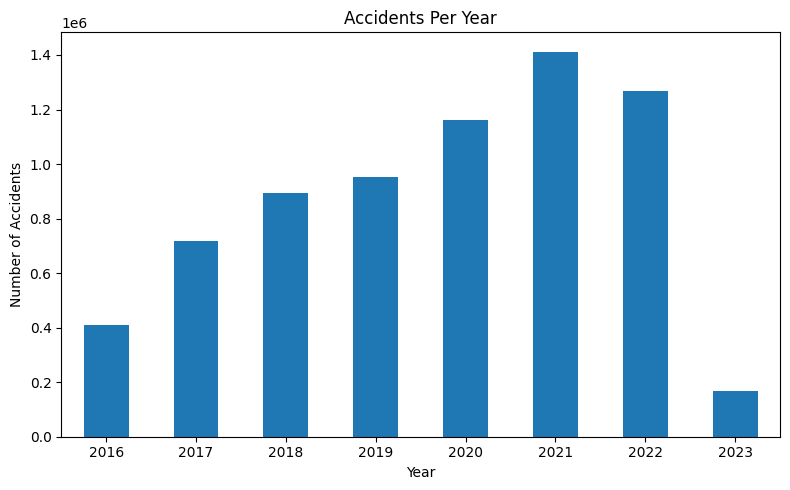

year
2016     410821
2017     717290
2018     893426
2019     954302
2020    1161598
2021    1412433
2022    1268806
2023     166552
Name: ID, dtype: int64

In [18]:
# Accidents Per Year

acc_by_year = df.groupby("year")["ID"].count()

plt.figure(figsize=(8,5))
acc_by_year.plot(kind="bar")
plt.title("Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

acc_by_year


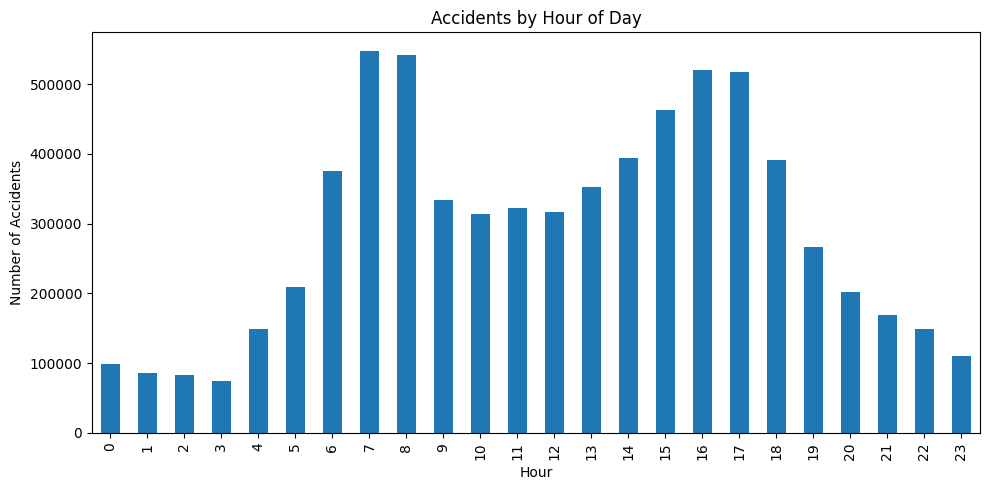

hour
0      98452
1      85743
2      82394
3      74229
4     149077
5     209579
6     375179
7     546789
8     541643
9     334067
10    313625
11    322215
12    316904
13    352361
14    394697
15    463389
16    520177
17    516626
18    390621
19    267045
20    201883
21    169500
22    148605
23    110428
Name: ID, dtype: int64

In [19]:
# Accidents by Hour

acc_by_hour = df.groupby("hour")["ID"].count()

plt.figure(figsize=(10,5))
acc_by_hour.plot(kind="bar")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

acc_by_hour


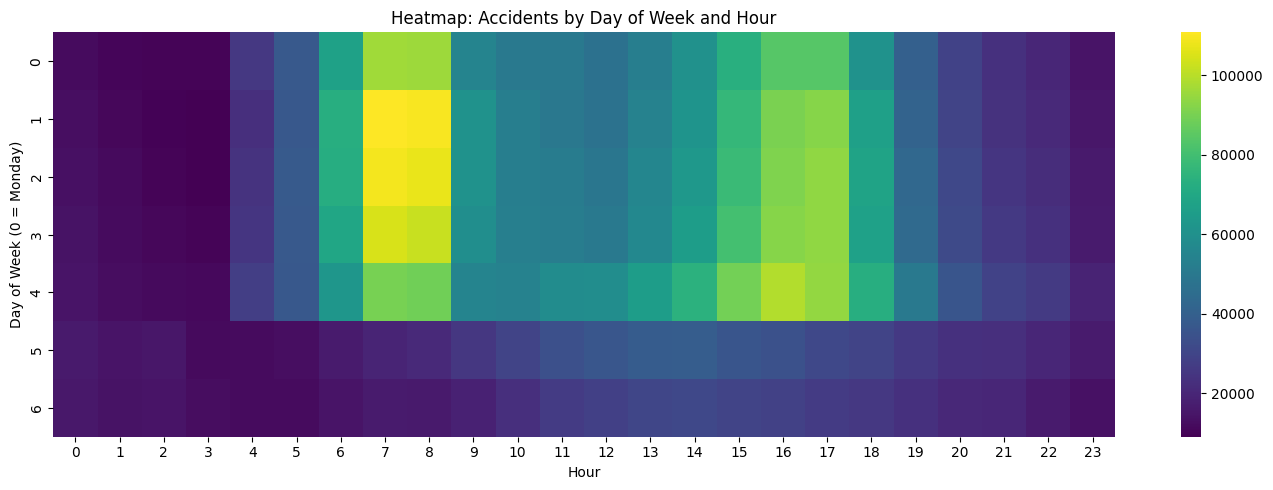

In [20]:
# Heatmap: Day of Week × Hour

heatmap_df = df.pivot_table(
    index="dayofweek",
    columns="hour",
    values="ID",
    aggfunc="count"
)

plt.figure(figsize=(14,5))
sns.heatmap(heatmap_df, cmap="viridis")
plt.title("Heatmap: Accidents by Day of Week and Hour")
plt.xlabel("Hour")
plt.ylabel("Day of Week (0 = Monday)")
plt.tight_layout()
plt.show()


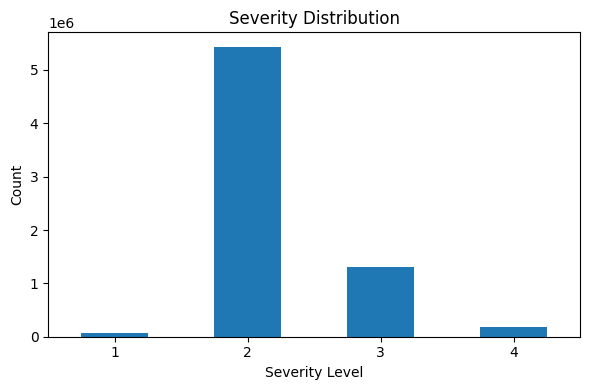

Severity
1      67364
2    5433878
3    1299257
4     184729
Name: count, dtype: int64

In [21]:
# Severity Distribution

severity_counts = df["Severity"].value_counts().sort_index()

plt.figure(figsize=(6,4))
severity_counts.plot(kind="bar")
plt.title("Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

severity_counts


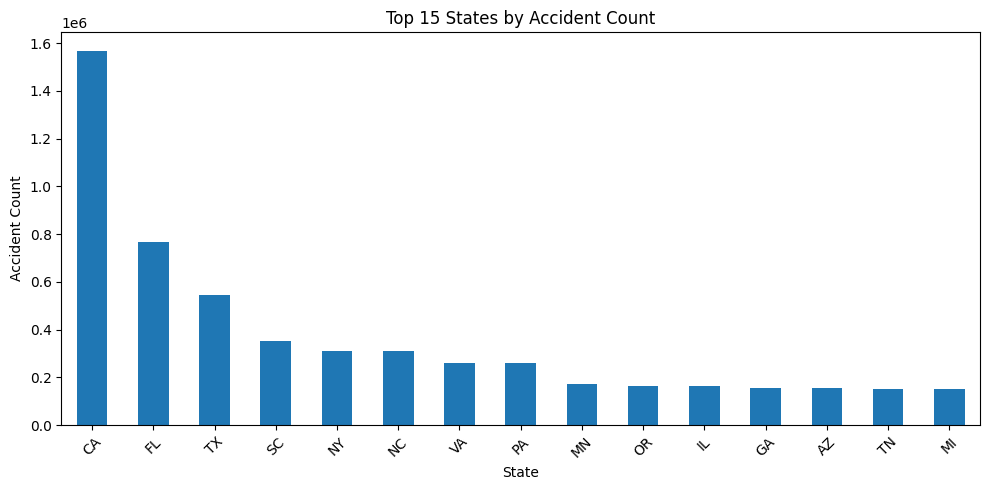

State
CA    1567136
FL     765625
TX     544807
SC     351032
NY     310351
NC     309871
VA     261645
PA     261208
MN     171888
OR     162808
IL     161417
GA     156322
AZ     153989
TN     151898
MI     150725
Name: count, dtype: int64

In [22]:
# Top 15 States by Accident Count

top_states = df["State"].value_counts().head(15)

plt.figure(figsize=(10,5))
top_states.plot(kind="bar")
plt.title("Top 15 States by Accident Count")
plt.xlabel("State")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_states


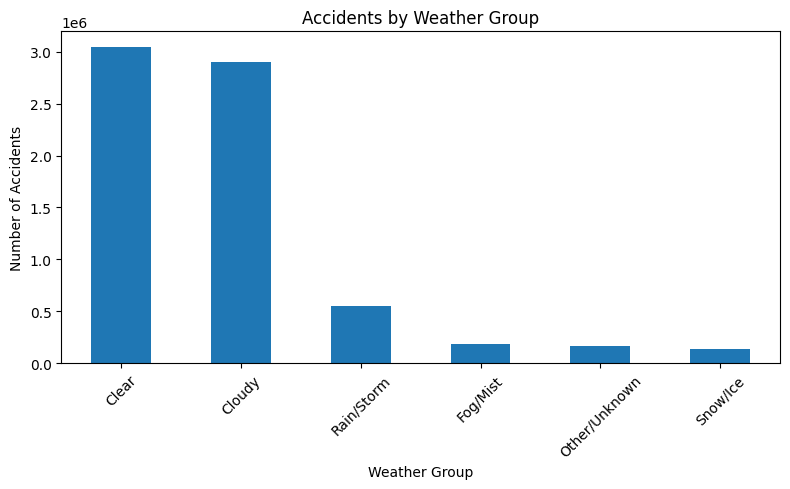

weather_group
Clear            3044607
Cloudy           2899282
Rain/Storm        547422
Fog/Mist          183998
Other/Unknown     170210
Snow/Ice          139709
Name: count, dtype: int64

In [23]:
# Weather Group vs Accident Count

weather_counts = df["weather_group"].value_counts()

plt.figure(figsize=(8,5))
weather_counts.plot(kind="bar")
plt.title("Accidents by Weather Group")
plt.xlabel("Weather Group")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

weather_counts


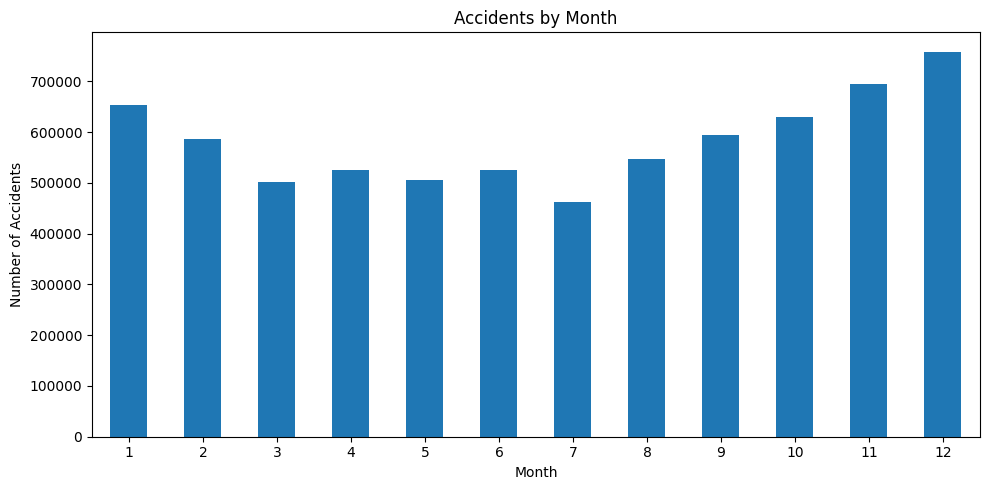

month
1     652682
2     585606
3     501362
4     526210
5     505614
6     524750
7     463263
8     547206
9     593815
10    630325
11    695612
12    758783
Name: ID, dtype: int64

In [24]:
# Accidents by Month

acc_by_month = df.groupby("month")["ID"].count()

plt.figure(figsize=(10,5))
acc_by_month.plot(kind="bar")
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

acc_by_month

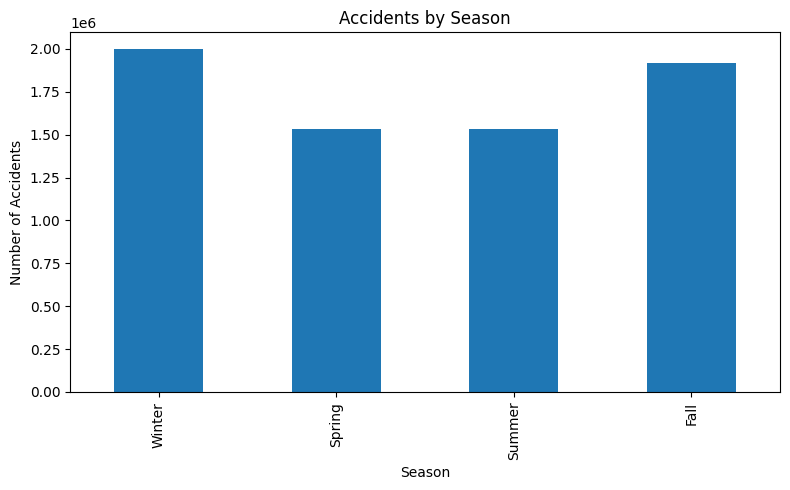

season
Winter    1997071
Spring    1533186
Summer    1535219
Fall      1919752
Name: ID, dtype: int64

In [25]:
# Accidents by Season

acc_by_season = df.groupby("season")["ID"].count().reindex(["Winter", "Spring", "Summer", "Fall"])

plt.figure(figsize=(8,5))
acc_by_season.plot(kind="bar")
plt.title("Accidents by Season")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

acc_by_season


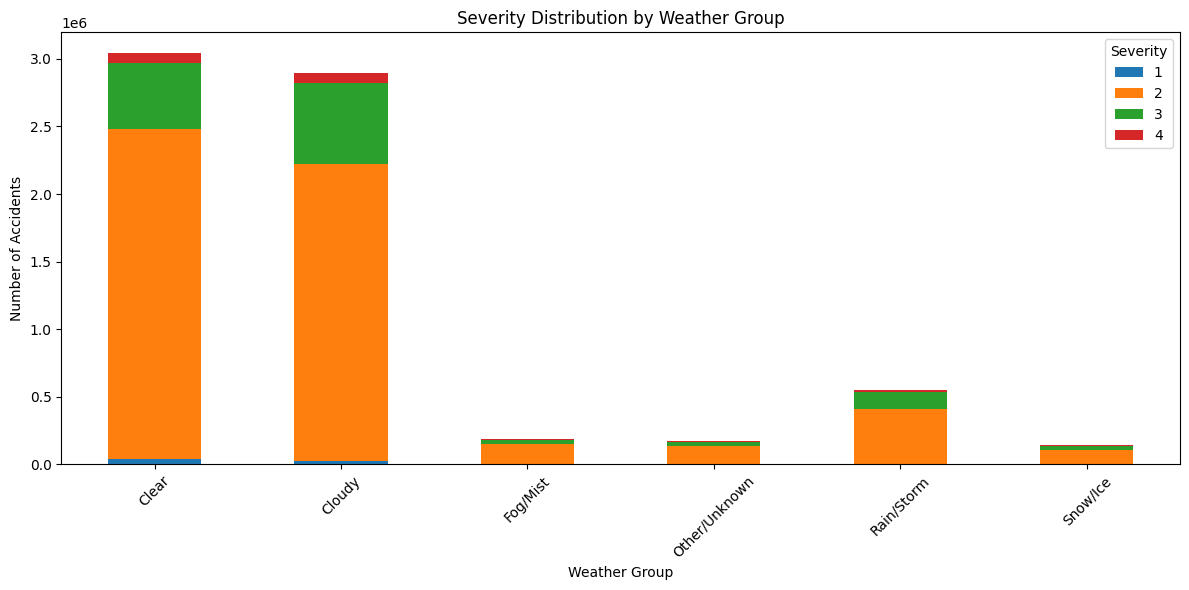

Severity,1,2,3,4
weather_group,,,,
Clear,35054,2443347,488445,77761
Cloudy,26063,2195078,601959,76182
Fog/Mist,943,150730,28197,4128
Other/Unknown,985,130328,31928,6969
Rain/Storm,4196,406563,122451,14212
Snow/Ice,123,107832,26277,5477


In [26]:
# Severity by Weather Group

sev_weather = df.groupby(["weather_group", "Severity"])["ID"].count().unstack()

sev_weather.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Severity Distribution by Weather Group")
plt.xlabel("Weather Group")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sev_weather


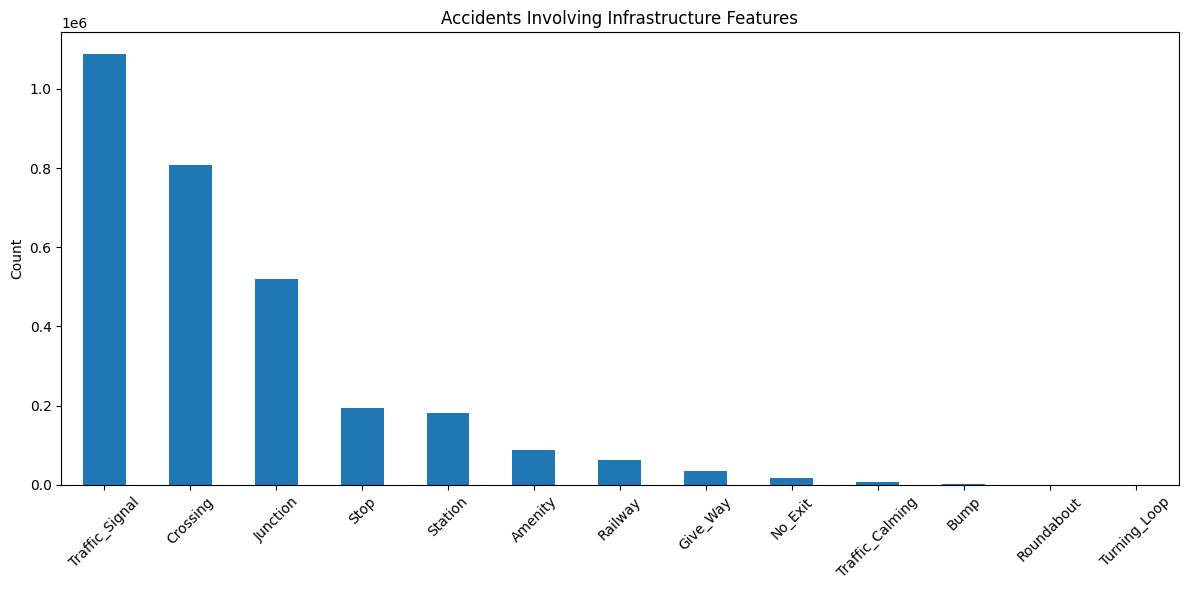

Traffic_Signal     1088203
Crossing            808018
Junction            520602
Stop                194589
Station             181785
Amenity              87593
Railway              61628
Give_Way             34276
No_Exit              17744
Traffic_Calming       6843
Bump                  3114
Roundabout             220
Turning_Loop             0
dtype: int64

In [27]:
# Infrastructure Features: Accident Frequency

infra_cols = [
    "Amenity","Bump","Crossing","Give_Way","Junction","No_Exit",
    "Railway","Roundabout","Station","Stop","Traffic_Calming",
    "Traffic_Signal","Turning_Loop"
]

infra_counts = df[infra_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
infra_counts.plot(kind="bar")
plt.title("Accidents Involving Infrastructure Features")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

infra_counts


<Figure size 800x500 with 0 Axes>

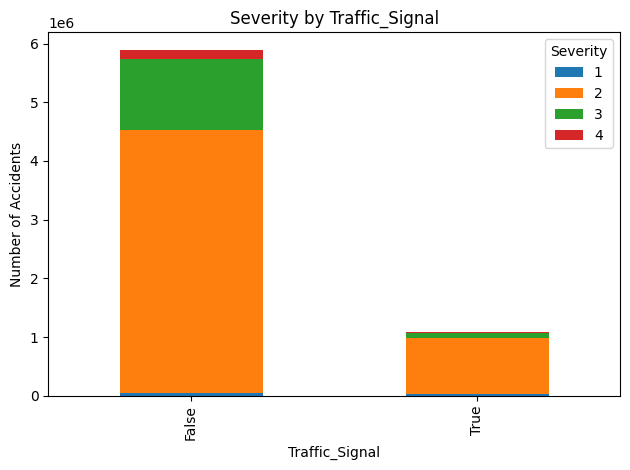


Severity table for Traffic_Signal:
 Severity            1        2        3       4
Traffic_Signal                                 
False           41024  4479034  1210650  166317
True            26340   954844    88607   18412


<Figure size 800x500 with 0 Axes>

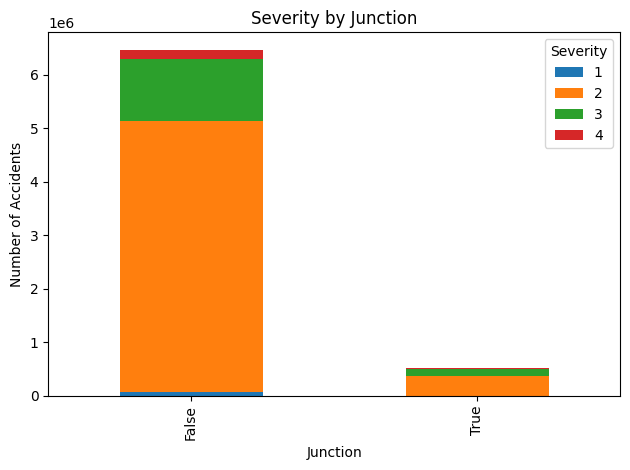


Severity table for Junction:
 Severity      1        2        3       4
Junction                                 
False     64237  5067894  1166777  165718
True       3127   365984   132480   19011


<Figure size 800x500 with 0 Axes>

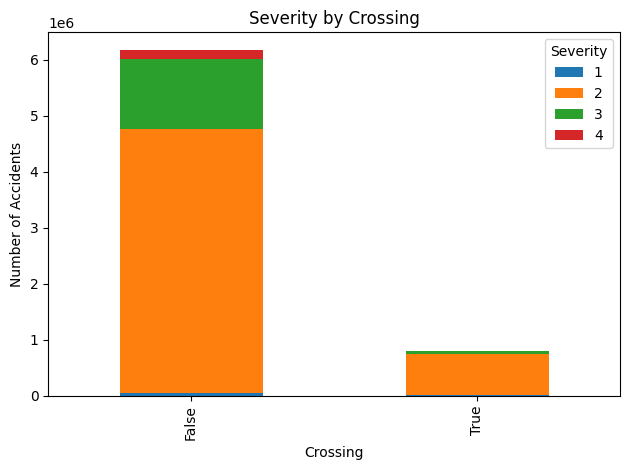


Severity table for Crossing:
 Severity      1        2        3       4
Crossing                                 
False     48673  4705013  1251227  172297
True      18691   728865    48030   12432


In [28]:
# Severity by Traffic Signal / Junction / Crossing

key_infra = ["Traffic_Signal", "Junction", "Crossing"]

for col in key_infra:
    sev_infra = df.groupby([col, "Severity"])["ID"].count().unstack()
    plt.figure(figsize=(8,5))
    sev_infra.plot(kind="bar", stacked=True)
    plt.title(f"Severity by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Accidents")
    plt.tight_layout()
    plt.show()
    
    print(f"\nSeverity table for {col}:\n", sev_infra)


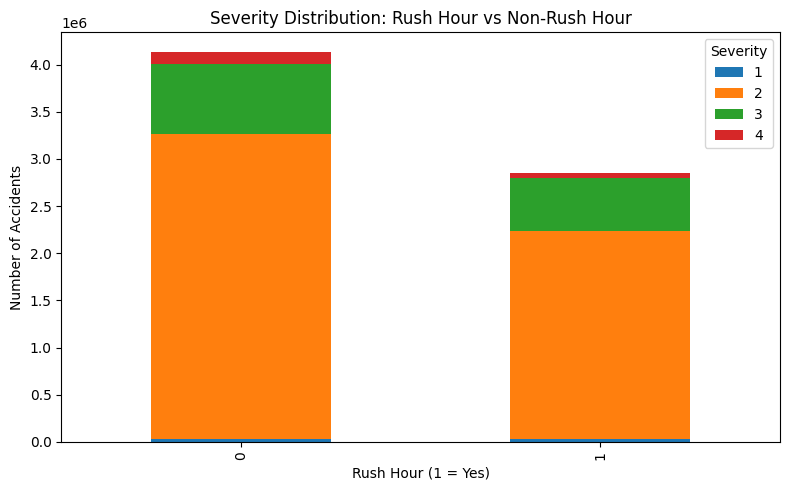

Severity,1,2,3,4
is_rush_hour,,,,
0,32289,3228308,746846,127862
1,35075,2205570,552411,56867


In [29]:
# Severity by Rush Hour

sev_rush = df.groupby(["is_rush_hour", "Severity"])["ID"].count().unstack()

sev_rush.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Severity Distribution: Rush Hour vs Non-Rush Hour")
plt.xlabel("Rush Hour (1 = Yes)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

sev_rush


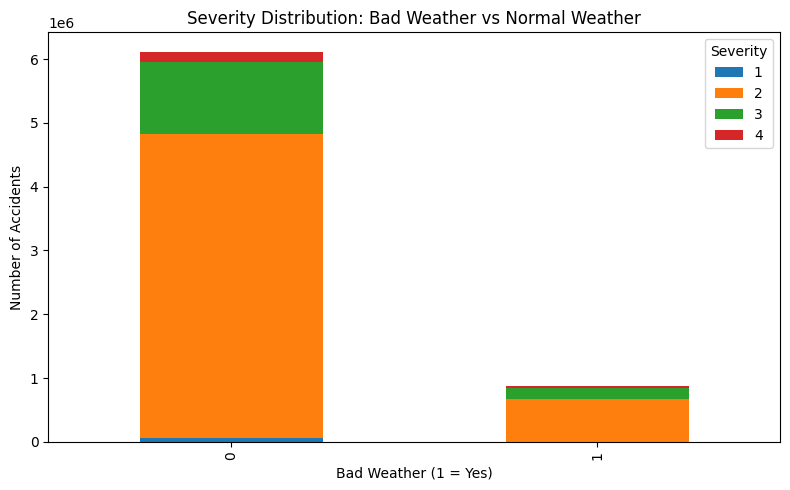

Severity,1,2,3,4
is_bad_weather,,,,
0,62102,4768753,1122332,160912
1,5262,665125,176925,23817


In [30]:
# Severity by Bad Weather

sev_bad_weather = df.groupby(["is_bad_weather", "Severity"])["ID"].count().unstack()

sev_bad_weather.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Severity Distribution: Bad Weather vs Normal Weather")
plt.xlabel("Bad Weather (1 = Yes)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

sev_bad_weather


## 📐 5. Statistical Analysis

In this section, we move beyond visual patterns and apply **formal statistical tests**  
to validate relationships in the US Traffic Accidents dataset.

The goals here are to:

- Test whether **accident severity** is associated with:
  - Weather conditions (weather groups & bad weather flag)
  - Time period (rush hour vs non–rush hour)
  - Key infrastructure features (traffic signals, junctions, crossings)
- Compare **numeric variables** (like visibility and temperature) across severity levels.
- Quantify relationships using a **correlation matrix** for key numeric features.


### 🔹 5.1 Categorical Relationships (Chi-Square Tests)

We will use **Chi-square tests of independence** to assess whether accident severity is  
statistically associated with the following categorical variables:

- `weather_group` (Clear, Cloudy, Rain/Storm, Fog/Mist, Snow/Ice, Other/Unknown)
- `is_bad_weather` (0 = normal weather, 1 = bad weather)
- `is_rush_hour` (0 = not rush hour, 1 = rush hour)
- `Traffic_Signal`, `Junction`, `Crossing` (road infrastructure features)

For each test:

- **Null hypothesis (H₀):** Severity is independent of the categorical variable.  
- **Alternative (H₁):** Severity depends on (is associated with) the categorical variable.  

We will focus on the **p-value**:

- If **p < 0.05**, we reject H₀ and conclude there is a statistically significant association.  
- If **p ≥ 0.05**, we do not find strong evidence of association.


### 🔹 5.2 Numerical Differences Across Severity (T-test & ANOVA)

We will examine whether certain continuous variables differ between:

- **Severe vs non-severe accidents**  
  - T-test comparing mean `Visibility(mi)` between:
    - Severe accidents (Severity 3–4)
    - Non-severe accidents (Severity 1–2)

- **Severity levels (1, 2, 3, 4)**  
  - One-way ANOVA comparing mean `Temperature(F)` across severity levels.

For these tests:

- **Null hypothesis (H₀):** The means are equal across groups.  
- **Alternative (H₁):** At least one group mean is different.


### 🔹 5.3 Correlation Matrix

Finally, we compute a **correlation matrix** for selected numeric variables, including:

- `Severity`
- `Temperature(F)`, `Humidity(%)`, `Pressure(in)`
- `Visibility(mi)`, `Wind_Speed(mph)`, `Precipitation(in)`
- `Distance(mi)`
- `is_bad_weather`, `is_rush_hour`, `is_weekend`

This helps quantify **direction** (positive/negative) and **strength** of linear relationships  
between severity and key features.


After running these tests, we will interpret the results and connect them to the EDA findings  
to support our final **Insights & Recommendations** in the next section.


In [31]:
# Chi-Square: Severity vs Weather Group

import scipy.stats as stats

ct_weather = pd.crosstab(df["weather_group"], df["Severity"])
chi2, p, dof, expected = stats.chi2_contingency(ct_weather)

print("Chi-square Test: Severity vs Weather Group")
print("Chi2:", chi2)
print("p-value:", p)
ct_weather


Chi-square Test: Severity vs Weather Group
Chi2: 34181.51313092373
p-value: 0.0


Severity,1,2,3,4
weather_group,,,,
Clear,35054,2443347,488445,77761
Cloudy,26063,2195078,601959,76182
Fog/Mist,943,150730,28197,4128
Other/Unknown,985,130328,31928,6969
Rain/Storm,4196,406563,122451,14212
Snow/Ice,123,107832,26277,5477


In [32]:
# Chi-Square: Severity vs is_bad_weather

ct_bad = pd.crosstab(df["is_bad_weather"], df["Severity"])
chi2, p, dof, expected = stats.chi2_contingency(ct_bad)

print("Chi-square Test: Severity vs Bad Weather")
print("Chi2:", chi2)
print("p-value:", p)
ct_bad


Chi-square Test: Severity vs Bad Weather
Chi2: 3199.2155032930154
p-value: 0.0


Severity,1,2,3,4
is_bad_weather,,,,
0,62102,4768753,1122332,160912
1,5262,665125,176925,23817


In [33]:
# Chi-Square: Severity vs is_rush_hour

ct_rush = pd.crosstab(df["is_rush_hour"], df["Severity"])
chi2, p, dof, expected = stats.chi2_contingency(ct_rush)

print("Chi-square Test: Severity vs Rush Hour")
print("Chi2:", chi2)
print("p-value:", p)
ct_rush


Chi-square Test: Severity vs Rush Hour
Chi2: 12900.253140704343
p-value: 0.0


Severity,1,2,3,4
is_rush_hour,,,,
0,32289,3228308,746846,127862
1,35075,2205570,552411,56867


In [34]:
# Chi-Square: Severity vs Key Infrastructure Features

infra_tests = ["Traffic_Signal", "Junction", "Crossing"]

for col in infra_tests:
    ct = pd.crosstab(df[col], df["Severity"])
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    
    print(f"\nChi-square Test: Severity vs {col}")
    print("Chi2:", chi2)
    print("p-value:", p)
    display(ct)



Chi-square Test: Severity vs Traffic_Signal
Chi2: 124970.46724336446
p-value: 0.0


Severity,1,2,3,4
Traffic_Signal,,,,
False,41024,4479034,1210650,166317
True,26340,954844,88607,18412



Chi-square Test: Severity vs Junction
Chi2: 21167.158982560188
p-value: 0.0


Severity,1,2,3,4
Junction,,,,
False,64237,5067894,1166777,165718
True,3127,365984,132480,19011



Chi-square Test: Severity vs Crossing
Chi2: 118244.58686297535
p-value: 0.0


Severity,1,2,3,4
Crossing,,,,
False,48673,4705013,1251227,172297
True,18691,728865,48030,12432


In [35]:
# T-Test: Visibility for Severe vs Non-Severe

df["is_severe"] = df["Severity"].isin([3,4]).astype(int)

severe_vis = df[df["is_severe"] == 1]["Visibility(mi)"]
nonsevere_vis = df[df["is_severe"] == 0]["Visibility(mi)"]

t_stat, p = stats.ttest_ind(severe_vis, nonsevere_vis, equal_var=False)

print("T-Test: Visibility Severe vs Non-Severe")
print("t-stat:", t_stat)
print("p-value:", p)

severe_vis.mean(), nonsevere_vis.mean()


T-Test: Visibility Severe vs Non-Severe
t-stat: -1.1039845843763796
p-value: 0.26959994741969484


(9.111814956475335, 9.114730419058079)

In [36]:
# ANOVA: Compare Mean Temperature by Severity Level

anova_df = df[["Severity", "Temperature(F)"]].dropna()

groups = [
    anova_df[anova_df["Severity"] == s]["Temperature(F)"]
    for s in sorted(df["Severity"].unique())
]

F_stat, p_value = stats.f_oneway(*groups)

print("ANOVA: Temperature by Severity Level")
print("F-stat:", F_stat)
print("p-value:", p_value)


ANOVA: Temperature by Severity Level
F-stat: 9443.794602451202
p-value: 0.0


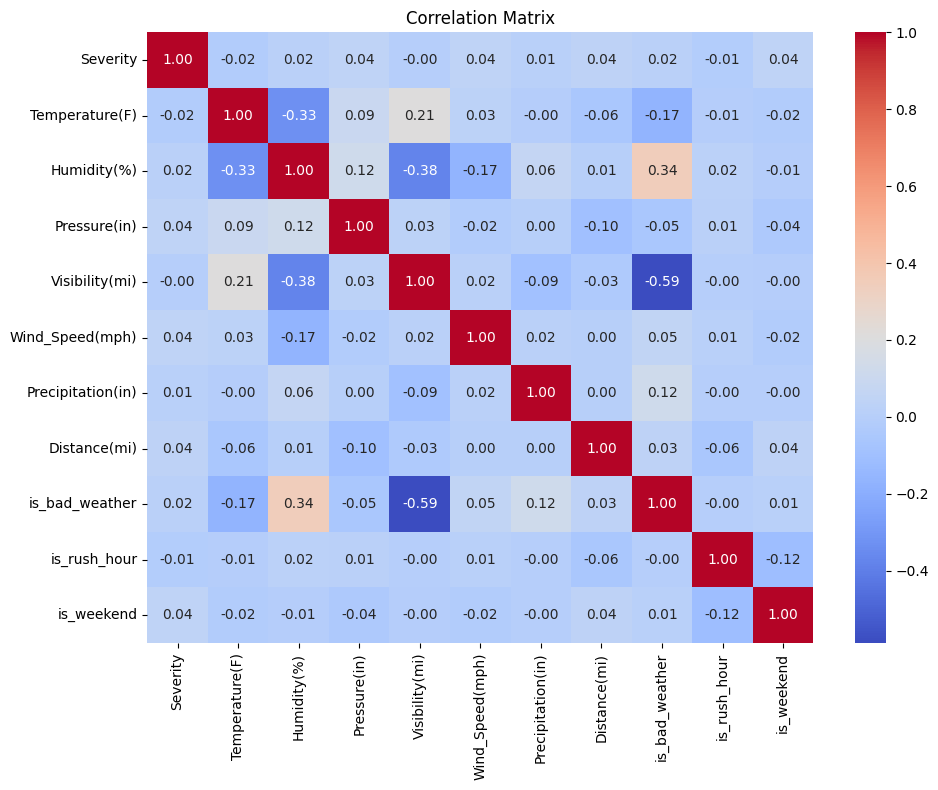

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Distance(mi),is_bad_weather,is_rush_hour,is_weekend
Severity,1.00,-0.02,0.02,0.04,-0.00,0.04,0.01,0.04,0.02,-0.01,0.04
Temperature(F),-0.02,1.00,-0.33,0.09,0.21,0.03,-0.00,-0.06,-0.17,-0.01,-0.02
Humidity(%),0.02,-0.33,1.00,0.12,-0.38,-0.17,0.06,0.01,0.34,0.02,-0.01
Pressure(in),0.04,0.09,0.12,1.00,0.03,-0.02,0.00,-0.10,-0.05,0.01,-0.04
Visibility(mi),-0.00,0.21,-0.38,0.03,1.00,0.02,-0.09,-0.03,-0.59,-0.00,-0.00
Wind_Speed(mph),0.04,0.03,-0.17,-0.02,0.02,1.00,0.02,0.00,0.05,0.01,-0.02
Precipitation(in),0.01,-0.00,0.06,0.00,-0.09,0.02,1.00,0.00,0.12,-0.00,-0.00
Distance(mi),0.04,-0.06,0.01,-0.10,-0.03,0.00,0.00,1.00,0.03,-0.06,0.04
is_bad_weather,0.02,-0.17,0.34,-0.05,-0.59,0.05,0.12,0.03,1.00,-0.00,0.01
is_rush_hour,-0.01,-0.01,0.02,0.01,-0.00,0.01,-0.00,-0.06,-0.00,1.00,-0.12


In [37]:
# Correlation Matrix

num_cols = [
    "Severity", "Temperature(F)", "Humidity(%)", "Pressure(in)",
    "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)",
    "Distance(mi)", "is_bad_weather", "is_rush_hour", "is_weekend"
]

corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

corr


## 📐 Statistical Test Insights (Summary)

**1. Severity vs Weather Conditions**  
Chi-square tests showed highly significant relationships (p < 0.001), meaning accident severity varies across weather groups, especially during rain, snow, and fog.

**2. Severity vs Bad Weather**  
Severe accidents occur at higher rates during adverse weather (p < 0.001).

**3. Severity vs Rush Hour**  
Rush hour is significantly associated with accident severity (p < 0.001), confirming higher-risk commuting windows.

**4. Severity vs Infrastructure Features**  
Traffic signals, junctions, and crossings are all significantly related to severity (p < 0.001), indicating structural road features influence accident outcomes.

**5. Visibility Test (T-Test)**  
Visibility differences between severe and non-severe accidents were **not significant** (p = 0.27), meaning visibility alone does not predict severity.

**6. Temperature ANOVA**  
Although statistically significant (p < 0.001), temperature differences across severity levels have negligible practical effect.

Overall, categorical conditions (weather, rush hour, infrastructure) are strong contributors to severity, while most numerical weather variables have weak influence.


## Evaluation

### Business Insight/Recommendation 1

**Peak weekday rush hours (7–9 AM and 3–6 PM) show the highest accident volumes and elevated severity.**  
Targeted interventions during these windows - such as dynamic speed controls, congestion management, and increased patrol presence can meaningfully reduce both accident frequency and severity.

**Impact Metric:** Accident rate and severity during peak hours before vs. after intervention.


### Business Insight/Recommendation 2

**High-risk infrastructure elements - especially unsignalized intersections, major crossings, and complex junctions—are strongly associated with severe accidents.**  
Upgrading infrastructure with traffic signals, roundabouts, improved lighting, protected turn phases, and enhanced pedestrian crossings can significantly lower severity outcomes.

**Impact Metric:** Severity 3-4 accident rate at improved intersections.


### Business Insight/Recommendation 3

**Adverse weather conditions (Rain/Storm, Snow/Ice, Fog/Mist) significantly increase the proportion of severe accidents.**  
Implementing weather responsive traffic systems real time alerts, lower variable speed limits, and proactive road treatment can reduce high severity collisions in these conditions.

**Impact Metric:** Change in severe accidents (Severity 3-4) on weather affected days.


### Tableau Dashboard link

https://public.tableau.com/shared/23X2Z2T4N?:display_count=n&:origin=viz_share_link

Note: the link is mentioned in the above cell. In this step, I am just going to generate clean, aggregated datasets for Tableau. The full accident dataset contains ~7 million rows, which is too large for direct Tableau use.  
Instead, I plan to export summary tables that support interactive visualizations, including:

In [40]:
# 1. Accidents by Year
acc_by_year.to_csv("tableau_exports/accidents_by_year.csv")

# 2. Accidents by Month
acc_by_month.to_csv("tableau_exports/accidents_by_month.csv")

# 3. Accidents by State
top_states_full = df["State"].value_counts()
top_states_full.to_csv("tableau_exports/accidents_by_state.csv")

# 4. Accidents by Hour
acc_by_hour.to_csv("tableau_exports/accidents_by_hour.csv")

# 5. Heatmap: Day of Week × Hour
heatmap_df = df.pivot_table(
    index="dayofweek",
    columns="hour",
    values="ID",
    aggfunc="count"
)
heatmap_df.to_csv("tableau_exports/heatmap_day_hour.csv")

# 6. Severity Distribution
severity_counts.to_csv("tableau_exports/severity_distribution.csv")

# 7. Weather Group Summary
weather_counts.to_csv("tableau_exports/weather_group_counts.csv")

# 8. Infrastructure Feature Summary
infra_counts.to_csv("tableau_exports/infrastructure_counts.csv")

print("All Tableau export files created successfully in 'tableau_exports/' folder!")


All Tableau export files created successfully in 'tableau_exports/' folder!


In [41]:
# Export Combined Dataset for Tableau Filtering

cols_for_tableau = [
    "ID", "Severity", "year", "month", "dayofweek", "hour",
    "State", "City", "Distance(mi)", "weather_group",
    "is_bad_weather", "is_rush_hour", "is_weekend",
    "Traffic_Signal", "Junction", "Crossing"
]

df_tableau = df[cols_for_tableau]
df_tableau.to_csv("tableau_exports/accidents_filtered_for_tableau.csv", index=False)

print("Filtered Tableau dataset created: accidents_filtered_for_tableau.csv")


Filtered Tableau dataset created: accidents_filtered_for_tableau.csv


## 🏁 Conclusion and Next Steps

This analysis highlights three major drivers of accident severity across the U.S.:  
1. **Peak commuter traffic**,  
2. **Adverse weather conditions**, and  
3. **High-risk road infrastructure.**

Data shows that targeted operational strategies, weather adaptive traffic management, and infrastructure upgrades can directly reduce both accident frequency and severity. These insights provide clear, actionable pathways for the Department of Transportation to enhance roadway safety.

**Next Steps:**  
- Prioritize pilot programs in high volume states (CA, FL, TX) for maximum impact.  
- Evaluate intervention outcomes using severity focused performance metrics.

This completes the analytical portion of the project. The dashboard and presentation will serve as communication tools to support data-driven decision-making.
